На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

<li>В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные</li>
<li>Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый</li>

<p>Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.</p>

<h4>Задания:</h4>
<ol>
<li>Выберите метод, который предположительно подойдет в первом вопросе.</li>
<li>Проверьте, являются ли дисперсии внутри групп гомогенными.</li>
<li>Проведите тест на нормальность распределения.</li>
<li>Сравните средние в представленных группах.</li>
<li>Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. </li>
<li>Примите решение: какие картинки в итоге будем использовать?</li>
<li>Выберите метод для второго теста.</li>
<li>Визуализируйте распределение events для контрольной и тестовой групп. </li>
<li>Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. </li>
<li>Выберите формулу для модели, проведите тест.</li>
</ol>

<h4>Описание данных</h4>

<p>5_task_1:</p>

<li>id – id клиента в эксперименте</li>
<li>group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)</li>
<li>events – сколько блюд суммарно было заказано за период</li>

<p>5_task_2:</p>

<li>id – id клиента в эксперименте</li>
<li>segment – сегмент (high/low)</li>
<li>group – вид кнопки (control – старая версия, test – новая версия)</li>
<li>events – сколько блюд суммарно было заказано за период</li>


In [63]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
exp_img_shape = pd.read_csv('5_task_1.csv')

In [4]:
exp_img_shape.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [5]:
exp_img_shape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.2+ KB


In [11]:
exp_img_shape.group.unique()

array(['A', 'B', 'C'], dtype=object)

In [16]:
exp_img_shape_group_a = exp_img_shape[exp_img_shape.group == 'A']
exp_img_shape_group_b = exp_img_shape[exp_img_shape.group == 'B']
exp_img_shape_group_c = exp_img_shape[exp_img_shape.group == 'C']

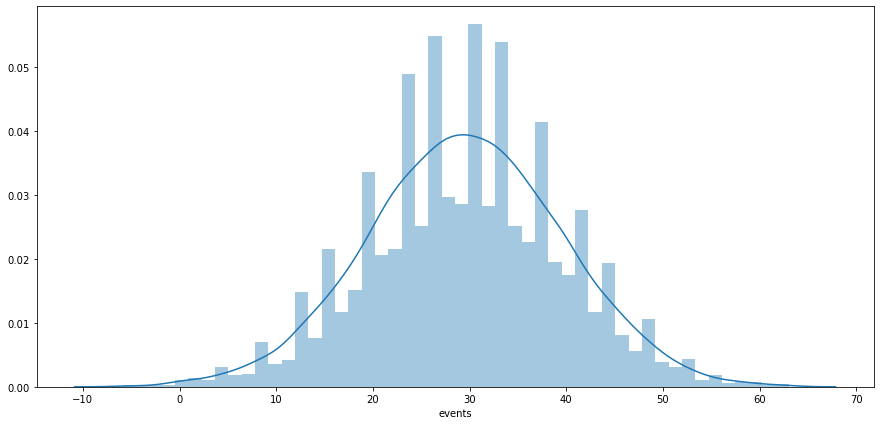

In [17]:
plt.figure(figsize=(15,7))
sns.distplot(exp_img_shape_group_a.events)

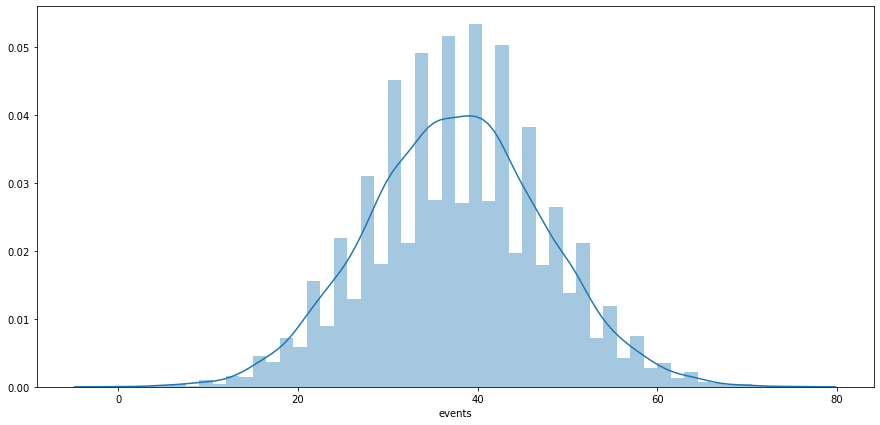

In [18]:
plt.figure(figsize=(15,7))
sns.distplot(exp_img_shape_group_b.events)

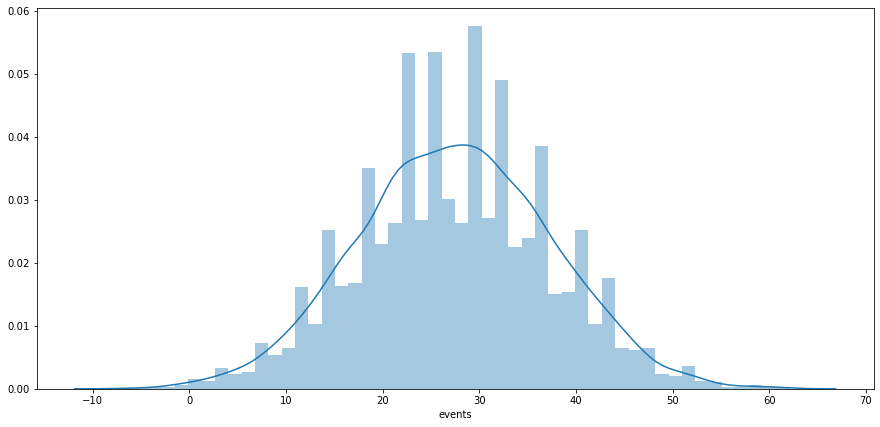

In [19]:
plt.figure(figsize=(15,7))
sns.distplot(exp_img_shape_group_c.events)

In [21]:
levene(exp_img_shape_group_a.events, exp_img_shape_group_b.events, exp_img_shape_group_c.events) #pvalue > 0.05 не отклоняем нулевую гипотезу о гомогенности дисперсий

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [23]:
exp_img_shape_group_a_sample = exp_img_shape_group_a.events.sample(1000, random_state=17)
exp_img_shape_group_b_sample = exp_img_shape_group_b.events.sample(1000, random_state=17)
exp_img_shape_group_c_sample = exp_img_shape_group_c.events.sample(1000, random_state=17)

In [25]:
shapiro(exp_img_shape_group_a_sample)# данные в тестовой группе A распределены нормально p > 0.05

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [26]:
shapiro(exp_img_shape_group_b_sample) # данные в тестовой группе B распределены нормально p > 0.05

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [27]:
shapiro(exp_img_shape_group_c_sample) # данные в тестовой группе C распределены нормально p > 0.05

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

In [31]:
f_oneway(exp_img_shape_group_a.events, exp_img_shape_group_b.events, exp_img_shape_group_c.events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [34]:
pairwise_tukeyhsd(exp_img_shape.events, exp_img_shape.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [36]:
print(round(exp_img_shape_group_a.events.mean(), 2), round(exp_img_shape_group_a.events.median(), 2))

29.58 30.0


In [37]:
print(round(exp_img_shape_group_b.events.mean(), 2), round(exp_img_shape_group_b.events.median(), 2))

37.61 38.0


In [38]:
print(round(exp_img_shape_group_c.events.mean(), 2), round(exp_img_shape_group_c.events.median(), 2))

27.47 27.0


<b>Вывод:</b> есть основание полагать, что использование квадратных картинок увеличивает среднее количество заказанных блюд

In [40]:
exp_order_button = pd.read_csv('5_task_2.csv')

In [41]:
exp_order_button.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [43]:
exp_order_button.group.unique()

array(['test', 'control'], dtype=object)

In [42]:
exp_order_button.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


In [44]:
exp_order_button_group_test = exp_order_button[exp_order_button.group == 'test']
exp_order_button_group_control = exp_order_button[exp_order_button.group == 'control']

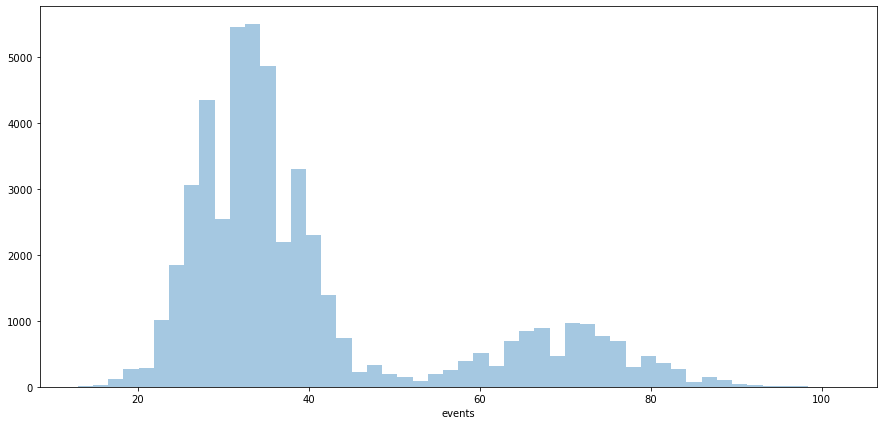

In [47]:
plt.figure(figsize=(15,7))
sns.distplot(exp_order_button_group_test.events, kde=False)

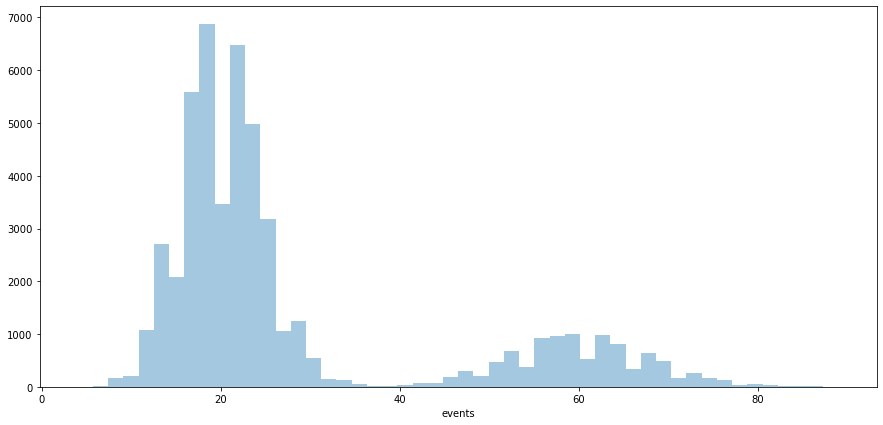

In [48]:
plt.figure(figsize=(15,7))
sns.distplot(exp_order_button_group_control.events, kde=False)

In [55]:
exp_order_button_group_test.groupby('segment').events.describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
high,10000.0,69.938500,8.403974,40.0,64.0,70.0,76.0,102.0
low,40000.0,33.025925,5.720845,13.0,29.0,33.0,37.0,59.0


In [56]:
exp_order_button_group_control.groupby('segment').events.describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
high,10000.0,59.970800,7.805347,31.0,55.0,60.0,65.0,89.0
low,40000.0,20.031575,4.473576,4.0,17.0,20.0,23.0,41.0


In [58]:
exp_order_button.groupby(['group' ,'segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

In [59]:
exp_order_button['combination'] = exp_order_button.group + ' / ' + exp_order_button.segment

In [61]:
exp_order_button

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high
...,...,...,...,...,...
99995,60695,control,low,15.0,control / low
99996,5934,control,low,16.0,control / low
99997,30046,control,low,22.0,control / low
99998,26474,control,low,21.0,control / low


In [68]:
formula = 'events ~ segment + group + segment:group'
model = ols(formula, exp_order_button).fit()
aov_table = anova_lm(model, typ=2)

In [69]:
aov_table

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377485,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [70]:
pairwise_tukeyhsd(exp_order_button.events,  exp_order_button.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control / high,control / low,-39.9392,0.001,-40.1073,-39.7711,True
control / high,test / high,9.9677,0.001,9.7551,10.1803,True
control / high,test / low,-26.9449,0.001,-27.113,-26.7768,True
control / low,test / high,49.9069,0.001,49.7388,50.075,True
control / low,test / low,12.9944,0.001,12.888,13.1007,True
test / high,test / low,-36.9126,0.001,-37.0807,-36.7445,True


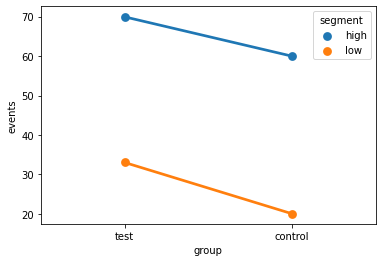

In [74]:
sns.pointplot(x='group', y='events', data=exp_order_button, hue='segment')